In [1]:
import pyvisa as visa
import time
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import math

In [2]:
rm = visa.ResourceManager()

In [3]:
rm.list_resources()

('USB0::0x0699::0x0363::C108011::INSTR',
 'ASRL1::INSTR',
 'ASRL2::INSTR',
 'ASRL3::INSTR',
 'ASRL10::INSTR')

In [4]:
osci=rm.open_resource('USB0::0x0699::0x0363::C108011::INSTR')
print(osci.query('*IDN?'))

TEKTRONIX,TDS 1002B,C108011,CF:91.1CT FV:v22.13



In [139]:
def save1(name,folder,autos=False):
    time_s = time.time()

    if autos:
        osci.write('AUTOS exec')
        time.sleep(6)

    osci.write('DAT:SOU CH1')
    xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
    osci.write('ACQ:STATE STOP')
    yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
    
    osci.write('DAT:ENC RPB')
    osci.write('DAT:WID 1')

    osci.write("DAT:SOU CH1")
    data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)
    tiempo = xze + np.arange(len(data1)) * xin
    data1v = (data1 - yoff1) * ymu1 + yze1

    osci.write('ACQ:STATE RUN')

    df = pd.DataFrame({'t':tiempo,'V1':data1v,})
    plt.plot(df.t,df.V1)

    plt.xlabel('t [s]')
    plt.ylabel('V [V]')
    plt.grid()
    plt.show()
    df.to_csv(f'{folder}/{name}.csv',index=False)
    
def save0(name,folder,autos=False):
    time_s = time.time()

    if autos:
        osci.write('AUTOS exec')
        time.sleep(6)

    osci.write('DAT:SOU CH1')
    xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
    osci.write('ACQ:STATE STOP')
    yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
    
    osci.write('DAT:ENC RPB')
    osci.write('DAT:WID 1')

    osci.write("DAT:SOU CH1")
    data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)
    tiempo = xze + np.arange(len(data1)) * xin
    data1v = (data1 - yoff1) * ymu1 + yze1

    osci.write('ACQ:STATE RUN')

    df = pd.DataFrame({'t':tiempo,'V1':data1v,})
    df.to_csv(f'{folder}/{name}.csv',index=False)

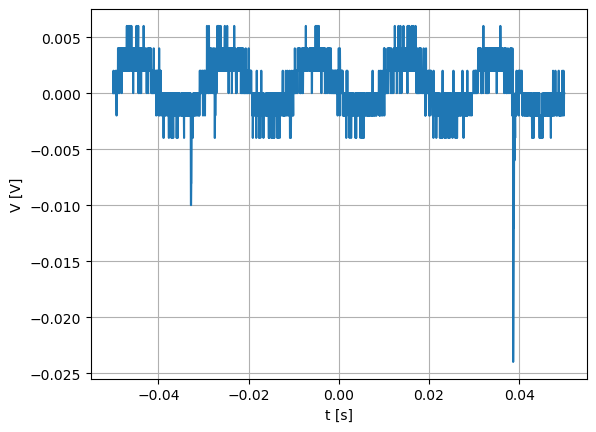

In [63]:
save1('test','.')

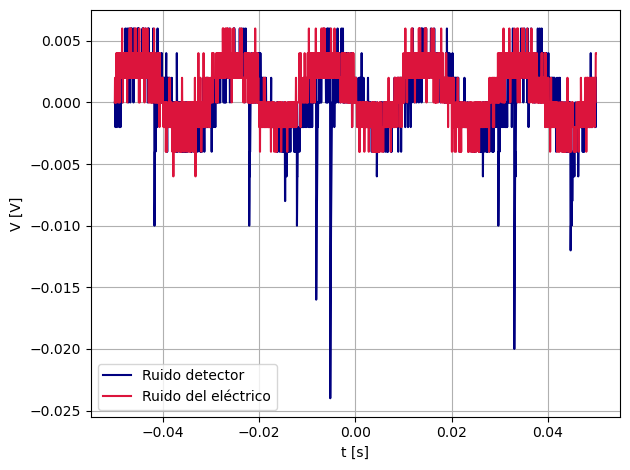

In [51]:
df = pd.read_csv('plots/ruido detector.csv')
plt.plot(df.t,df.V1,'navy',label='Ruido detector')
df = pd.read_csv('plots/ruido electrico.csv')
plt.plot(df.t,df.V1,'crimson',label='Ruido del eléctrico')

plt.xlabel('t [s]')
plt.ylabel('V [V]')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

In [137]:
def plot():
    time_s = time.time()

    osci.write('DAT:SOU CH1')
    xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
    #osci.write('ACQ:STATE STOP')
    yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
    
    osci.write('DAT:ENC RPB')
    osci.write('DAT:WID 1')

    osci.write("DAT:SOU CH1")
    data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)
    tiempo = xze + np.arange(len(data1)) * xin
    data1v = (data1 - yoff1) * ymu1 + yze1

    #osci.write('ACQ:STATE RUN')

    df = pd.DataFrame({'t':tiempo,'V1':data1v,})
    plt.plot(df.t,df.V1,'navy',label='Datos')
    plt.axhline(np.mean(df.V1)-threshold,c='crimson',ls='--')
    df = pd.read_csv('plots/ruido detector/0.csv')
    plt.plot(df.t,df.V1,'forestgreen')
    plt.axhline(np.mean(df.V1)-threshold,c='darkmagenta',ls='--')

    plt.xlabel('t [s]')
    plt.ylabel('V [V]')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

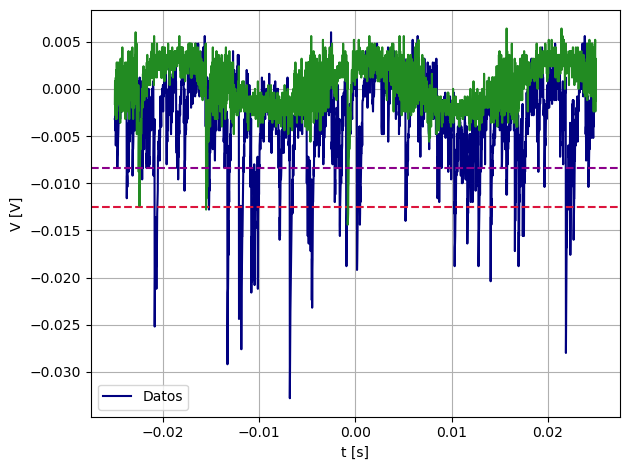

In [138]:
plot()

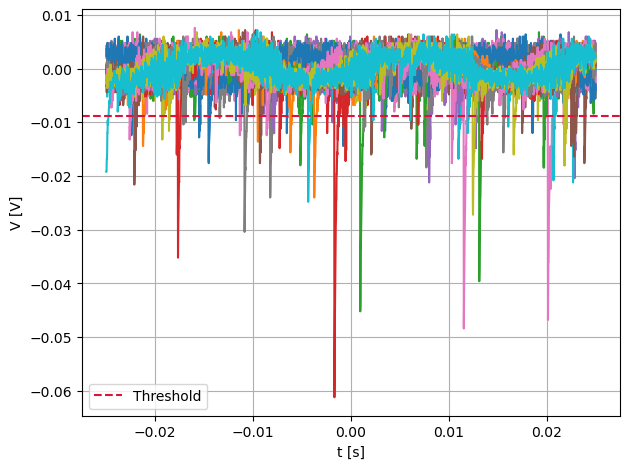

In [136]:
maximos = []
minimos = []
sigmas = []
avgs = []
for i in range(20):
    df = pd.read_csv(f'plots/ruido detector/{i}.csv')
    maximos.append(max(df.V1))#-np.mean(df.V1))
    minimos.append(min(df.V1))#-np.mean(df.V1))
    sigmas.append(np.std(df.V1))
    avgs.append(np.mean(df.V1))
    plt.plot(df.t,df.V1)
#    plt.plot(df.t,np.mean(df.V1)*np.ones_like(df.V1))
#plt.axhline(max(maximos),c='crimson',ls='--')
#plt.axhline(min(minimos),c='crimson',ls='--')
threshold = 3*np.mean(sigmas)
plt.axhline(np.mean(avgs)-threshold,c='crimson',ls='--',label='Threshold')


plt.xlabel('t [s]')
plt.ylabel('V [V]')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('plots/imgs/primer threshold.png')
plt.show()

In [ ]:
for i in range(2000):
    save0(f'{i}','plots/tanda full 1')